In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import RandomizedSearchCV as RandomCV

In [3]:
df = pd.read_csv('C:/Projects/Machine Learning Project/superconduct/train.csv')

df

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
0            51.968828  ...          2.257143       2.213364   
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0               2.219783         1.368922             1.066221              1   
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

C:\Users\shiva\AppData\Local\Temp/ipykernel_13624/3959540646.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

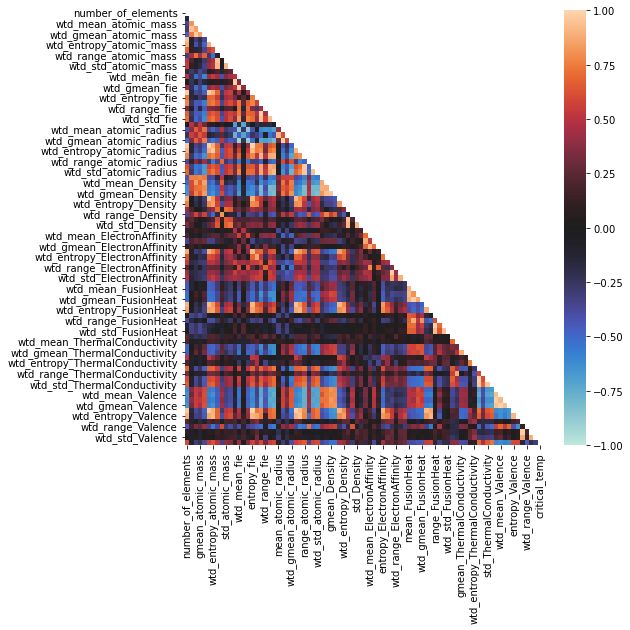

In [4]:
plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

C:\Users\shiva\AppData\Local\Temp/ipykernel_13624/3460604658.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

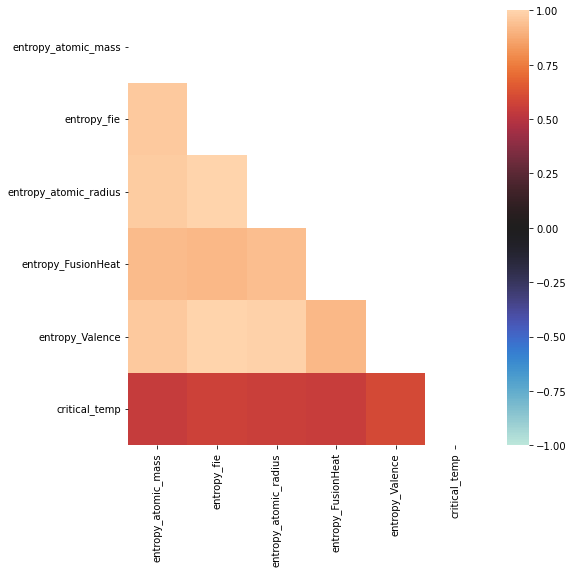

In [5]:
selected_features = ['entropy_atomic_mass', 'entropy_fie', 'entropy_atomic_radius', 
                     'entropy_FusionHeat', 'entropy_Valence', 'critical_temp']
df_ = df[selected_features]

plt.figure(figsize=(8,8))

corr = df_.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

In [6]:
# Separate predictors and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Make pipeline of standard scaling and PCA
sc = StandardScaler()
pca = PCA()
pipe = make_pipeline(sc, pca)

# Fit pipeline on data
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

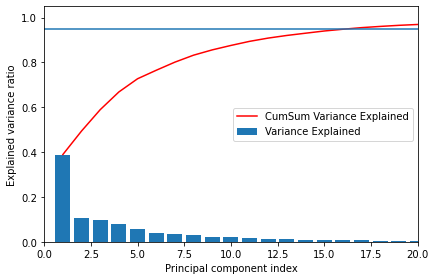

In [7]:
# Explained variance ratio
explained_ratio = pipe[1].explained_variance_ratio_

# Plot the variance ratio
nf = len(X.columns)
plt.bar(range(1,nf+1), explained_ratio, label='Variance Explained')
plt.plot(range(1,nf+1), np.cumsum(explained_ratio), label='CumSum Variance Explained', c='r')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.xlim(0,20)

# 95% variance threshold
plt.axhline(0.95)

plt.show()

In [8]:
# Pipeline with 15-component PCA
n_pca = 15
pca15 = PCA(n_pca, random_state=112)
pipe = make_pipeline(sc, pca15)

# Fit and transform predictors
X_pca = pipe.fit_transform(X)

# To dataframe
pca_n = np.arange(n_pca)
pca_n = ['PC'+str(i) for i in pca_n]
X_pca = pd.DataFrame(X_pca, columns=pca_n)

X_pca

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      -3.664487  0.991643  3.045260  1.713725  0.246057 -0.203213  0.450996   
1      -4.555468 -0.214585  1.722873  1.111493  0.981005 -1.011501 -0.245299   
2      -3.488176  1.055167  3.130821  1.811590  0.296335 -0.211823  0.485278   
3      -3.581284  1.020144  3.084663  1.760859  0.270516 -0.208459  0.466648   
4      -3.809671  0.948297  2.981358  1.627398  0.199680 -0.188465  0.426050   
...          ...       ...       ...       ...       ...       ...       ...   
21258   2.350607 -0.387111 -1.449530 -2.426772  2.911041 -1.754651  0.114289   
21259  -5.446209 -0.780202  1.336464 -0.290010  1.142610  0.236225  0.988119   
21260  10.477462 -0.931943  1.572640 -0.372598 -0.214181 -1.304828 -0.814939   
21261   9.771885 -1.001345  1.215602 -0.872021 -0.954733 -0.674220 -0.754652   
21262   3.915601  1.446385 -1.916167  2.649801 -4.114999  0.070731 -2.972715   

            PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0     -0.220079 -0.384095  0.220377  0.632358  0.151006 -0.521041 -0.018933   
1      0.214117  0.408233 -1.139341  1.057388  0.565323 -0.605458 -0.010224   
2      0.010470 -0.496759  0.180601  0.737592  0.143167 -0.565931 -0.019663   
3     -0.108675 -0.439157  0.199952  0.684031  0.147425 -0.542728 -0.019140   
4     -0.426505 -0.279214  0.263074  0.533306  0.156720 -0.481101 -0.019258   
...         ...       ...       ...       ...       ...       ...       ...   
21258 -1.041990 -0.186562  1.235747 -1.220795 -0.381641 -1.449558 -0.293064   
21259 -0.775728  0.324691 -0.793197 -1.033390 -0.073571 -1.077450 -0.188153   
21260  0.052750 -0.720368 -0.347569  0.003667 -0.939779  0.557999 -0.903669   
21261 -1.624886  0.146397 -0.065903 -0.227883 -0.586940  0.764900 -1.059362   
21262  0.281892  0.184432  0.121053 -1.028966 -0.565068 -0.080327  1.701733   

           PC14  
0     -0.251162  
1     -0.824943  
2     -0.277609  
3     -0.264039  
4     -0.227391  
...         ...  
21258  1.401589  
21259  0.071751  
21260 -0.272483  
21261 -0.479449  
21262  2.130580  

[21263 rows x 15 columns]

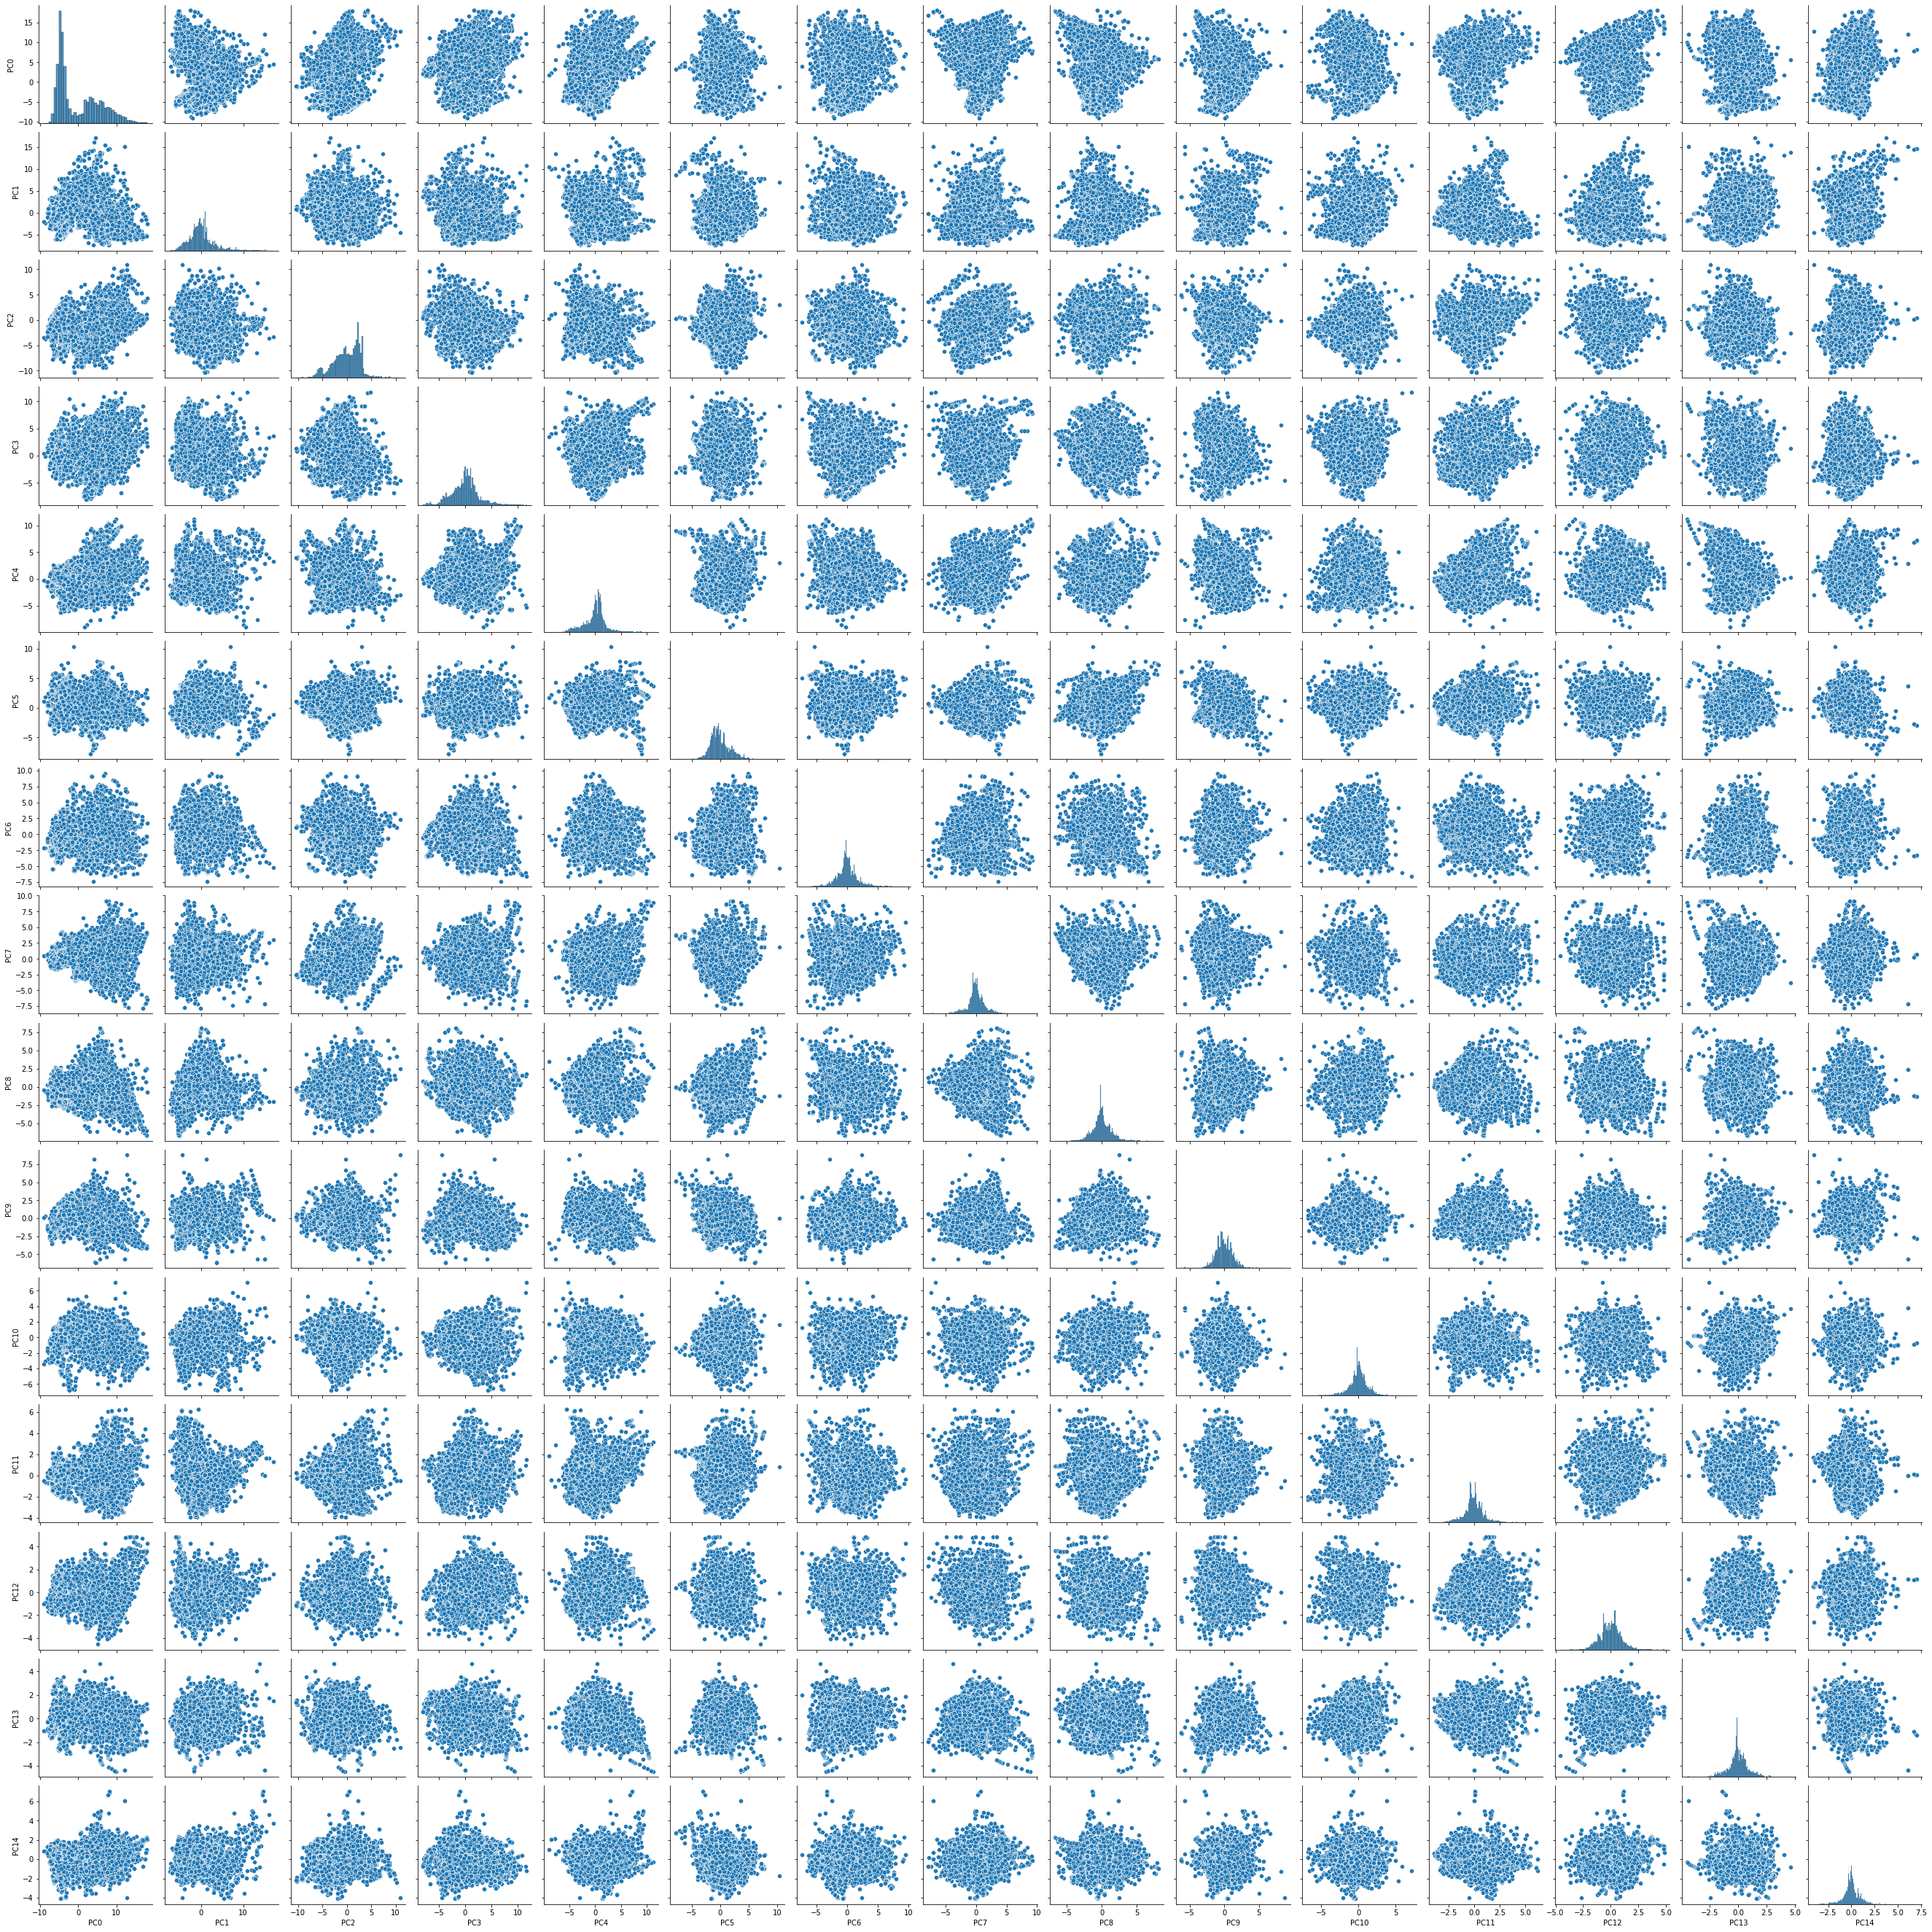

In [9]:
# Pairplot
sns.pairplot(X_pca)

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline
n_pca = 15
scaler = StandardScaler()
pca = PCA(n_pca, random_state=112)
model = RFR()
pipe = make_pipeline(scaler, pca, model)

# Cross-validation
cross_val_score(pipe, X_train, y_train, cv=5)

array([0.90869371, 0.89853776, 0.89809861, 0.89284037, 0.90540397])

In [11]:
# Fit to train set
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

print(f'Train R2: {pipe.score(X_train, y_train)}')
print(f'Test R2: {pipe.score(X_test, y_test)}')

Train R2: 0.976336437600548
Test R2: 0.9100497384776707


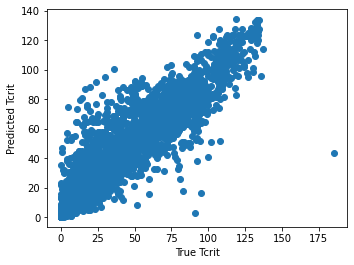

In [12]:
# True vs. Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
plt.gca().set_aspect('equal')

In [13]:
#Hyper Parameter Tuning

In [14]:
# Our baseline model parameters
pipe[2][1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1489076278,
 'splitter': 'best'}

In [15]:
    # Randomized CV with 5-fold
param_grid = {'randomforestregressor__max_depth': [30, 50, 70],
              'randomforestregressor__min_samples_leaf': [2, 5, 10],
             'randomforestregressor__n_estimators': [400, 500, 600]}

rf_random = RandomCV(estimator=pipe, param_distributions=param_grid, 
                  n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [16]:
# Fit to train set
rf_random.fit(X_train, y_train)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 